In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [35]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import EarlyStopping

# from lightgbm import LGBMRegressor
# import random
# import xgboost as xgb
from pytorch_tabnet.tab_model import TabNetRegressor
import torch

In [36]:
curr_dir = os.getcwd()
curr_dir

'C:\\weather\\uv_new'

In [37]:
forders_tr = os.listdir(curr_dir+"\\data\\"+"\\outlier_train_val")
forders_tr

['2001_uv_nooutlier.csv',
 '2002_uv_nooutlier.csv',
 '2003_uv_nooutlier.csv',
 '2004_uv_nooutlier.csv',
 '2005_uv_nooutlier.csv',
 '2006_uv_nooutlier.csv',
 '2007_uv_nooutlier.csv',
 '2008_uv_nooutlier.csv',
 '2009_uv_nooutlier.csv',
 '2010_uv_nooutlier.csv',
 '2011_uv_nooutlier.csv',
 '2012_uv_nooutlier.csv',
 '2101_uv_nooutlier.csv',
 '2102_uv_nooutlier.csv',
 '2103_uv_nooutlier.csv',
 '2104_uv_nooutlier.csv',
 '2105_uv_nooutlier.csv',
 '2106_uv_nooutlier.csv',
 '2107_uv_nooutlier.csv',
 '2108_uv_nooutlier.csv',
 '2109_uv_nooutlier.csv',
 '2110_uv_nooutlier.csv',
 '2111_uv_nooutlier.csv',
 '2112_uv_nooutlier.csv']

In [90]:
d = pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\outlier_train_val\\")+forders_tr[5])['uv'] == 0
d.sum()

28094

In [38]:
summer_tr = forders_tr[4:10] + forders_tr[12+4:12+10-3]
summer_tr

summer_val = forders_tr[12+10-3:12+10]
summer_val

['2108_uv_nooutlier.csv', '2109_uv_nooutlier.csv', '2110_uv_nooutlier.csv']

In [39]:
# summer = summer_tr + summer_val
# summer

In [40]:
train = pd.DataFrame()

for files in summer_tr:
    df= pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\outlier_train_val\\")+files)
    train = pd.concat([train, df])
    
train.drop('idx', axis=1, inplace=True)
train

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
0,20200501,0,13,126.16000,33.30000,0.0,0.00000,-0.00057,-0.00030,0.00165,...,252.91737,277.63245,277.03649,275.67037,262.71147,130.35092,38.96359,-6.11462,71.00,0
1,20200501,0,105,128.89098,37.75147,0.0,-0.00057,-0.00057,-0.00060,-0.00090,...,256.69212,286.82011,287.23821,285.51819,269.40510,126.43187,43.95463,-5.60867,26.04,3
2,20200501,0,108,126.96500,37.57100,0.0,0.00000,0.00000,0.00000,0.00090,...,253.85590,281.28558,281.42512,280.03692,266.81080,126.31564,43.77999,-5.59822,85.50,3
3,20200501,0,112,126.62490,37.47772,0.0,0.00000,0.00000,0.00089,0.00030,...,254.78101,283.03827,283.39275,282.06360,268.05385,126.36437,43.67046,-5.60546,68.99,3
4,20200501,0,115,130.89864,37.48129,0.0,0.00000,0.00000,0.00030,0.00075,...,251.68704,277.82840,278.25056,275.71853,262.56565,126.91833,43.74521,-5.66707,222.80,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65607,20210731,2350,146,127.11900,35.84080,0.1,0.00000,-0.00057,0.00030,-0.00060,...,264.53165,291.90287,290.09587,285.48855,270.82702,124.36364,41.81018,-4.72602,62.90,3
65608,20210731,2350,152,129.33472,35.58250,0.0,0.00000,0.00000,0.00000,-0.00030,...,262.88449,288.27382,286.67481,282.45891,269.23268,125.09137,41.52495,-4.87156,82.00,2
65609,20210731,2350,156,126.89158,35.17294,0.0,-0.00057,0.00000,0.00000,0.00015,...,262.57588,287.50208,284.96722,280.05240,267.56515,124.95628,41.04849,-4.79509,72.38,3
65610,20210731,2350,159,129.03203,35.10468,0.0,0.00000,0.00000,-0.00119,0.00000,...,262.22936,287.43410,286.66069,283.63739,270.60537,125.49764,40.96396,-4.91507,69.56,3


In [41]:
train = train.reset_index()
train = train.drop('index',axis=1)
train

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
0,20200501,0,13,126.16000,33.30000,0.0,0.00000,-0.00057,-0.00030,0.00165,...,252.91737,277.63245,277.03649,275.67037,262.71147,130.35092,38.96359,-6.11462,71.00,0
1,20200501,0,105,128.89098,37.75147,0.0,-0.00057,-0.00057,-0.00060,-0.00090,...,256.69212,286.82011,287.23821,285.51819,269.40510,126.43187,43.95463,-5.60867,26.04,3
2,20200501,0,108,126.96500,37.57100,0.0,0.00000,0.00000,0.00000,0.00090,...,253.85590,281.28558,281.42512,280.03692,266.81080,126.31564,43.77999,-5.59822,85.50,3
3,20200501,0,112,126.62490,37.47772,0.0,0.00000,0.00000,0.00089,0.00030,...,254.78101,283.03827,283.39275,282.06360,268.05385,126.36437,43.67046,-5.60546,68.99,3
4,20200501,0,115,130.89864,37.48129,0.0,0.00000,0.00000,0.00030,0.00075,...,251.68704,277.82840,278.25056,275.71853,262.56565,126.91833,43.74521,-5.66707,222.80,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578933,20210731,2350,146,127.11900,35.84080,0.1,0.00000,-0.00057,0.00030,-0.00060,...,264.53165,291.90287,290.09587,285.48855,270.82702,124.36364,41.81018,-4.72602,62.90,3
578934,20210731,2350,152,129.33472,35.58250,0.0,0.00000,0.00000,0.00000,-0.00030,...,262.88449,288.27382,286.67481,282.45891,269.23268,125.09137,41.52495,-4.87156,82.00,2
578935,20210731,2350,156,126.89158,35.17294,0.0,-0.00057,0.00000,0.00000,0.00015,...,262.57588,287.50208,284.96722,280.05240,267.56515,124.95628,41.04849,-4.79509,72.38,3
578936,20210731,2350,159,129.03203,35.10468,0.0,0.00000,0.00000,-0.00119,0.00000,...,262.22936,287.43410,286.66069,283.63739,270.60537,125.49764,40.96396,-4.91507,69.56,3


In [42]:
ratio=[]
num = []
for i in range(len(train.columns)):
    ratio.append(len(train[train[train.columns[i]] == -999.0])/len(train))
    num.append(len(train[train[train.columns[i]] == -999.0]))
ratio

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [43]:
val = pd.DataFrame()

for files in summer_val:
    df= pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\outlier_train_val\\")+files)
    val = pd.concat([val, df])
    
val.drop('idx', axis=1, inplace=True)
val

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
0,20210801,0,13,126.16000,33.30000,0.0,0.00000,-0.00057,0.00089,-0.00015,...,264.44311,290.55389,288.92546,284.67080,270.70772,127.16116,38.96359,-5.60122,71.00,0
1,20210801,0,105,128.89098,37.75147,0.0,-0.00057,-0.00057,0.00000,-0.00015,...,259.14507,283.10942,282.76528,280.43877,268.61000,123.36327,43.95463,-5.09260,26.04,3
2,20210801,0,108,126.96500,37.57100,0.0,0.00000,0.00057,-0.00119,0.00120,...,252.93837,273.65182,270.18990,267.15459,258.99048,123.18739,43.77999,-5.07447,85.50,3
3,20210801,0,112,126.62490,37.47772,0.0,0.00000,0.00000,-0.00030,-0.00060,...,250.27920,268.14394,268.04466,266.56403,259.34748,123.22507,43.67046,-5.08058,68.99,3
4,20210801,0,115,130.89864,37.48129,0.0,0.00000,0.00000,0.00000,-0.00015,...,263.38986,289.67998,288.05013,284.04277,269.26719,123.91259,43.74521,-5.16058,222.80,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62893,20211031,2350,146,127.11900,35.84080,0.1,0.00000,-0.00057,0.00030,-0.00015,...,243.98668,261.95199,261.21896,259.29863,250.50021,157.14313,41.81018,-8.56636,62.90,3
62894,20211031,2350,152,129.33472,35.58250,0.0,0.00000,0.00000,-0.00089,0.00120,...,255.89419,281.48837,281.57322,280.00595,265.73255,157.99342,41.52495,-8.67521,82.00,2
62895,20211031,2350,156,126.89158,35.17294,0.0,0.00057,0.00000,0.00000,0.00015,...,246.57815,265.43902,264.76641,262.60697,252.65714,157.69250,41.04849,-8.59148,72.38,3
62896,20211031,2350,159,129.03203,35.10468,0.0,0.00057,0.00000,-0.00179,-0.00060,...,257.75436,284.11394,283.85736,280.96228,265.34129,158.37811,40.96396,-8.68840,69.56,3


In [44]:
ratio=[]
num = []
for i in range(len(val.columns)):
    ratio.append(len(val[val[val.columns[i]] == -999.0])/len(val))
    num.append(len(val[val[val.columns[i]] == -999.0]))
ratio

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [45]:
forders_te = os.listdir(curr_dir+"\\data\\"+"\\outlier_test")
forders_te

df = pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\outlier_test\\")+forders_te[0])
# d = list(df.columns)
# for j in range(1,len(d)):
#     d[j] = d[j].replace("202206_uv.", "")
# df.columns = d
df.drop('Unnamed: 0', axis=1, inplace=True)
test = df
test

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
0,20220601,0,13,126.16000,33.30000,0,0.00000,0.00000,-0.00060,0.00060,...,241.07130,251.49092,250.11913,248.78686,243.12601,123.72706,38.96359,-5.16304,71.00,0
1,20220601,0,105,128.89098,37.75147,0,-0.00057,-0.00057,0.00000,-0.00030,...,244.35010,262.71227,261.14580,257.52658,246.95577,119.74915,43.95463,-4.61100,26.04,3
2,20220601,0,108,126.96500,37.57100,0,0.00000,-0.00057,-0.00030,0.00045,...,249.24111,271.81756,270.25616,266.99858,254.94651,119.65871,43.77999,-4.60329,85.50,3
3,20220601,0,112,126.62490,37.47772,0,0.00000,0.00000,0.00060,0.00045,...,249.94977,273.52547,272.33661,269.12853,256.15036,119.71313,43.67046,-4.61180,68.99,3
4,20220601,0,115,130.89864,37.48129,0,0.00000,0.00000,0.00089,-0.00030,...,239.88321,253.29031,251.46606,249.01625,240.92761,120.21661,43.74521,-4.67107,222.80,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51850,20220625,0,146,127.11900,35.84080,0,0.00000,-0.00057,-0.00089,0.00015,...,258.49191,286.87485,287.19605,285.48855,271.35400,119.84431,41.81018,-4.59718,62.90,3
51851,20220625,0,152,129.33472,35.58250,0,-0.00057,0.00000,-0.00030,-0.00030,...,263.99872,293.32422,293.51096,291.15861,274.60342,120.42121,41.52495,-4.67124,82.00,2
51852,20220625,0,156,126.89158,35.17294,0,0.00000,0.00000,0.00089,-0.00030,...,261.53112,290.14436,290.23278,288.05655,273.15633,120.46896,41.04849,-4.68457,72.38,3
51853,20220625,0,159,129.03203,35.10468,0,0.00000,0.00057,0.00030,-0.00075,...,260.95627,287.80066,287.63090,285.01340,270.36623,120.85844,40.96396,-4.73249,69.56,3


In [46]:
ratio=[]
num = []
for i in range(len(test.columns)):
    ratio.append(len(test[test[test.columns[i]] == -999.0])/len(test))
    num.append(len(test[test[test.columns[i]] == -999.0]))
ratio

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

# Model

In [47]:
train

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
0,20200501,0,13,126.16000,33.30000,0.0,0.00000,-0.00057,-0.00030,0.00165,...,252.91737,277.63245,277.03649,275.67037,262.71147,130.35092,38.96359,-6.11462,71.00,0
1,20200501,0,105,128.89098,37.75147,0.0,-0.00057,-0.00057,-0.00060,-0.00090,...,256.69212,286.82011,287.23821,285.51819,269.40510,126.43187,43.95463,-5.60867,26.04,3
2,20200501,0,108,126.96500,37.57100,0.0,0.00000,0.00000,0.00000,0.00090,...,253.85590,281.28558,281.42512,280.03692,266.81080,126.31564,43.77999,-5.59822,85.50,3
3,20200501,0,112,126.62490,37.47772,0.0,0.00000,0.00000,0.00089,0.00030,...,254.78101,283.03827,283.39275,282.06360,268.05385,126.36437,43.67046,-5.60546,68.99,3
4,20200501,0,115,130.89864,37.48129,0.0,0.00000,0.00000,0.00030,0.00075,...,251.68704,277.82840,278.25056,275.71853,262.56565,126.91833,43.74521,-5.66707,222.80,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578933,20210731,2350,146,127.11900,35.84080,0.1,0.00000,-0.00057,0.00030,-0.00060,...,264.53165,291.90287,290.09587,285.48855,270.82702,124.36364,41.81018,-4.72602,62.90,3
578934,20210731,2350,152,129.33472,35.58250,0.0,0.00000,0.00000,0.00000,-0.00030,...,262.88449,288.27382,286.67481,282.45891,269.23268,125.09137,41.52495,-4.87156,82.00,2
578935,20210731,2350,156,126.89158,35.17294,0.0,-0.00057,0.00000,0.00000,0.00015,...,262.57588,287.50208,284.96722,280.05240,267.56515,124.95628,41.04849,-4.79509,72.38,3
578936,20210731,2350,159,129.03203,35.10468,0.0,0.00000,0.00000,-0.00119,0.00000,...,262.22936,287.43410,286.66069,283.63739,270.60537,125.49764,40.96396,-4.91507,69.56,3


In [48]:
X_train = train.drop(['yyyymmdd', 'hhnn', 'stn', 'lon', 'lat', 'uv', 'landtype'], axis=1).to_numpy()
X_val = val.drop(['yyyymmdd', 'hhnn', 'stn', 'lon', 'lat', 'uv', 'landtype'],axis=1).to_numpy()
X_test = test.drop(['yyyymmdd', 'hhnn', 'stn', 'lon', 'lat', 'uv', 'landtype'],axis=1).to_numpy()

y_train = train['uv'].to_numpy().reshape(-1,1)
y_val = val['uv'].to_numpy().reshape(-1,1)

In [49]:
max_epochs = 1000
patience = 50         # 10
batch_size=1024
virtual_batch_size=128

In [ ]:
es = EarlyStopping(monitor='val_mse', verbose=1, patience=10)

save_dir = os.path.join(os.getcwd(),'save')

model_name = 'tabnet.{epoch:02d}.h5' 
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)


checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_mse',
                             verbose=True,
                             save_best_only=True)

callbacks = [checkpoint,es] 

In [52]:
# train.drop('uv',axis=1)
# train1 = train.drop('uv',axis=1)
# X = train1.to_numpy()
# # X_val = val.drop('uv',axis=1)
# X_test1 = test.drop('uv',axis=1)
# X_test = X_test1.to_numpy()

# yy = train['uv']
# y = yy.to_numpy().reshape(-1,1)
# y_val = val[['uv']].values


# # kf = KFold(n_splits=5, random_state=42, shuffle=True)
# predictions_array =[]
# CV_score_array    =[]
# for train_index, test_index in tqdm(kf.split(X)):
# #     print(train_index)
#     X_train, X_valid = X[train_index], X[test_index]
#     y_train, y_valid = y[train_index], y[test_index]
regressor = TabNetRegressor(verbose=True,seed=42)
regressor.fit(X_train=X_train, y_train=y_train,
          eval_set=[(X_val, y_val)],
          patience=patience, 
          max_epochs=max_epochs,
          virtual_batch_size=virtual_batch_size,
          num_workers=1,                      # 300, 2000
          eval_metric=['rmse'], 
          drop_last=False,
#           callbacks=callbacks     # 이거 쓰면 patience 위에꺼 삭제
             )

#     CV_score_array.append(regressor.best_cost)
#     predictions_array.append(np.expm1(regressor.predict(X_test)))

# predictions = np.mean(predictions_array,axis=0)

Device used : cpu
epoch 0  | loss: 0.66607 | val_0_rmse: 0.6258  |  0:00:57s
epoch 1  | loss: 0.43301 | val_0_rmse: 0.56067 |  0:01:40s
epoch 2  | loss: 0.40312 | val_0_rmse: 0.6394  |  0:02:23s
epoch 3  | loss: 0.38598 | val_0_rmse: 0.56849 |  0:03:05s
epoch 4  | loss: 0.37586 | val_0_rmse: 0.62897 |  0:04:03s
epoch 5  | loss: 0.37122 | val_0_rmse: 0.58035 |  0:04:54s
epoch 6  | loss: 0.35524 | val_0_rmse: 0.55178 |  0:05:37s
epoch 7  | loss: 0.3486  | val_0_rmse: 0.50726 |  0:06:23s
epoch 8  | loss: 0.35003 | val_0_rmse: 0.53218 |  0:07:09s
epoch 9  | loss: 0.3381  | val_0_rmse: 0.54394 |  0:07:54s
epoch 10 | loss: 0.3357  | val_0_rmse: 0.54138 |  0:08:42s
epoch 11 | loss: 0.34298 | val_0_rmse: 0.55744 |  0:09:36s
epoch 12 | loss: 0.33335 | val_0_rmse: 0.59867 |  0:10:21s
epoch 13 | loss: 0.33057 | val_0_rmse: 0.53836 |  0:11:06s
epoch 14 | loss: 0.32883 | val_0_rmse: 0.52561 |  0:11:53s
epoch 15 | loss: 0.32312 | val_0_rmse: 0.5048  |  0:12:38s
epoch 16 | loss: 0.32192 | val_0_rmse:

epoch 139| loss: 0.28447 | val_0_rmse: 0.56371 |  2:06:01s
epoch 140| loss: 0.28612 | val_0_rmse: 0.55449 |  2:06:45s
epoch 141| loss: 0.28544 | val_0_rmse: 0.56226 |  2:07:31s
epoch 142| loss: 0.28577 | val_0_rmse: 0.58173 |  2:08:17s
epoch 143| loss: 0.28421 | val_0_rmse: 0.62434 |  2:09:09s
epoch 144| loss: 0.28712 | val_0_rmse: 0.60088 |  2:09:58s
epoch 145| loss: 0.28515 | val_0_rmse: 0.53748 |  2:10:43s
epoch 146| loss: 0.28595 | val_0_rmse: 0.58567 |  2:11:29s
epoch 147| loss: 0.28346 | val_0_rmse: 0.62605 |  2:12:16s
epoch 148| loss: 0.28929 | val_0_rmse: 0.49758 |  2:13:01s
epoch 149| loss: 0.2896  | val_0_rmse: 0.51316 |  2:13:48s
epoch 150| loss: 0.28667 | val_0_rmse: 0.48431 |  2:14:33s
epoch 151| loss: 0.28883 | val_0_rmse: 0.58091 |  2:15:18s
epoch 152| loss: 0.28557 | val_0_rmse: 0.48606 |  2:16:03s
epoch 153| loss: 0.28323 | val_0_rmse: 0.49275 |  2:16:48s
epoch 154| loss: 0.28378 | val_0_rmse: 0.51777 |  2:17:33s
epoch 155| loss: 0.28348 | val_0_rmse: 0.53492 |  2:18:2

In [56]:
RMSE = np.sqrt(mean_squared_error(y_val, regressor.predict(X_val)) )    # tabnet은 알아서 best weight저장됨.
print("The rmse is %.5f" % RMSE )

The rmse is 0.47790


In [65]:
PATH = "tabnet.pt"

# Save
torch.save(regressor, PATH)

# Load
# model = torch.load(PATH)

In [80]:
pred = regressor.predict(X_test)
submission=pd.read_csv('1-1_검증데이터셋.csv', encoding='utf-8')
submission1=submission.copy()
submission1['UV'] = pred
submission1
submission1.to_csv("220224_tabnet_uv_nooutlier_summer1.csv", index = False)

In [81]:
submission1

,YearMonthDayHourMinute,STN,UV
0,202206010000,13,0.0
1,202206010000,105,0.0
2,202206010000,108,0.0
3,202206010000,112,0.0
4,202206010000,115,0.0
...,...,...,...
51850,202206250000,146,0.0
51851,202206250000,152,0.0
51852,202206250000,156,0.0
51853,202206250000,159,0.0


In [82]:
submission1['UV'].value_counts()      # 정렬해서 보기

0.000000    19951
0.079594        6
0.037847        6
0.033340        6
0.032907        6
            ...  
0.165632        1
0.038123        1
0.081658        1
0.043395        1
0.000826        1
Name: UV, Length: 31282, dtype: int64

<AxesSubplot:>

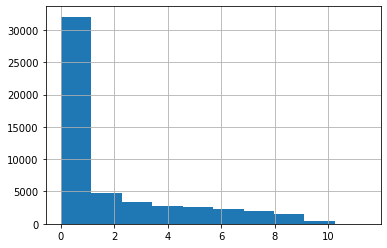

In [83]:
submission1['UV'].hist()      

In [84]:
submission1[submission1['UV']>7]

,YearMonthDayHourMinute,STN,UV
949,202206011030,115,7.057698
958,202206011030,159,7.108233
964,202206011040,115,7.406122
966,202206011040,132,7.189980
973,202206011040,159,7.831148
...,...,...,...
51005,202206241440,131,7.193859
51007,202206241440,133,7.716255
51016,202206241450,105,7.271829
51022,202206241450,133,7.162390


In [85]:
submission1[submission1['UV']<7]

,YearMonthDayHourMinute,STN,UV
0,202206010000,13,0.0
1,202206010000,105,0.0
2,202206010000,108,0.0
3,202206010000,112,0.0
4,202206010000,115,0.0
...,...,...,...
51850,202206250000,146,0.0
51851,202206250000,152,0.0
51852,202206250000,156,0.0
51853,202206250000,159,0.0


In [86]:
# 관측소별로 자외선 지수 분석할지.

In [87]:
li = list(submission1['UV'].values)
li

li_0_1=[]
li_1_2=[]
li_2_3=[]
li_3_4=[]
li_4_5=[]
li_5_6=[]
li_6_7=[]
li_7_8=[]
li_8_9=[]
li_9_10=[]
li_10_11=[]
li_11_12=[]
li_12_13=[]
li_13_=[]
for i in range(len(li)):
    if (li[i]>=0 and li[i]<1):
        li_0_1.append(li[i])
    elif (li[i]>=1 and li[i]<2):
        li_1_2.append(li[i])
    elif (li[i]>=2 and li[i]<3):
        li_2_3.append(li[i])
    elif (li[i]>=3 and li[i]<4):
        li_3_4.append(li[i])
    elif (li[i]>=4 and li[i]<5):
        li_4_5.append(li[i])
    elif (li[i]>=5 and li[i]<6):
        li_5_6.append(li[i])
    elif (li[i]>=6 and li[i]<7):
        li_6_7.append(li[i])
    elif (li[i]>=7 and li[i]<8):
        li_7_8.append(li[i])
    elif (li[i]>=8 and li[i]<9):
        li_8_9.append(li[i])
    elif (li[i]>=9 and li[i]<10):
        li_9_10.append(li[i])
    elif (li[i]>=10 and li[i]<11):
        li_10_11.append(li[i])
    elif (li[i]>=11 and li[i]<12):
        li_11_12.append(li[i])
    elif (li[i]>=12 and li[i]<13):
        li_12_13.append(li[i])
    elif li[i]>=13:
        li_13_.append(li[i])
        
df11_num = pd.DataFrame([len(li_0_1),len(li_1_2),len(li_2_3),len(li_3_4),len(li_4_5),len(li_5_6),\
                        len(li_6_7),len(li_7_8),len(li_8_9),len(li_9_10),len(li_10_11),len(li_11_12),len(li_12_13),\
                        len(li_13_)])
df11_num

df11_ratio = pd.DataFrame([100*len(li_0_1)/len(li), 100*len(li_1_2)/len(li), 100*len(li_2_3)/len(li),\
                         100*len(li_3_4)/len(li), 100*len(li_4_5)/len(li), 100*len(li_5_6)/len(li), \
                          100*len(li_6_7)/len(li),100*len(li_7_8)/len(li),100*len(li_8_9)/len(li),100*len(li_9_10)/len(li),\
                          100*len(li_10_11)/len(li),100*len(li_11_12)/len(li),100*len(li_12_13)/len(li),\
                          100*len(li_13_)/len(li)])
df11_ratio

df11_1 = pd.concat([df11_num,df11_ratio],axis=1)
df11_1.columns = ['_num','_ratio']
df11_1.index = ['0_1','1_2','2_3','3_4','4_5','5_6','6_7','7_8','8_9','9_10','10_11','11_12','12_13','13_']
df11_1

,_num,_ratio
0_1,31369,60.493684
1_2,4376,8.438916
2_3,3313,6.388969
3_4,2610,5.033266
4_5,2305,4.445087
5_6,2164,4.173175
6_7,2023,3.901263
7_8,1751,3.376724
8_9,1408,2.715264
9_10,454,0.875518
